# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/input'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

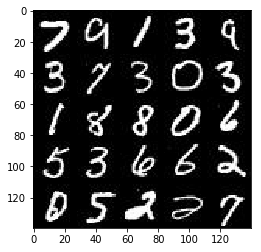

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

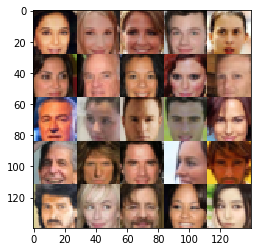

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    real_inputs = tf.placeholder(tf.float32,(None,image_width, image_height, 
                                             image_channels),name='real_inputs')
    z_inputs = tf.placeholder(tf.float32,(None,z_dim),name='z_inputs')
    lr = tf.placeholder(tf.float32,name='lr')

    return real_inputs, z_inputs, lr



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
         
    
        x1 = tf.layers.conv2d(images, 128, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        relu1 = tf.maximum(0.2 * x1, x1)
    
    
        x2 = tf.layers.conv2d(relu1, 256, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(0.2 * bn2, bn2)
       
        
        x3 = tf.layers.conv2d(relu2, 512, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(0.2 * bn3, bn3)
        
        
        
        flat = tf.reshape(relu3, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits 




"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator',reuse = not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(0.2 * x1, x1)
       
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.2 * x2, x2)
        
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(0.2 * x3, x3)
       
        
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        
        
        
        out = tf.tanh(logits)
        
  
    return out 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim,alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss
    
   
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

    d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, lr = model_inputs(image_width, image_height,image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z,image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images = batch_images * 2
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, lr:learning_rate})
                #_ = sess.run(g_opt, feed_dict={input_z: batch_z, lr:learning_rate})

                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 50, input_z, image_channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.5621... Generator Loss: 1.3207
Epoch 1/2... Discriminator Loss: 2.1516... Generator Loss: 3.1777
Epoch 1/2... Discriminator Loss: 1.4522... Generator Loss: 0.7255
Epoch 1/2... Discriminator Loss: 1.6058... Generator Loss: 0.7738
Epoch 1/2... Discriminator Loss: 1.6589... Generator Loss: 0.4731
Epoch 1/2... Discriminator Loss: 1.5715... Generator Loss: 0.8612
Epoch 1/2... Discriminator Loss: 1.5245... Generator Loss: 1.4328
Epoch 1/2... Discriminator Loss: 1.3733... Generator Loss: 1.2248
Epoch 1/2... Discriminator Loss: 1.6965... Generator Loss: 0.4304
Epoch 1/2... Discriminator Loss: 1.5749... Generator Loss: 0.4600


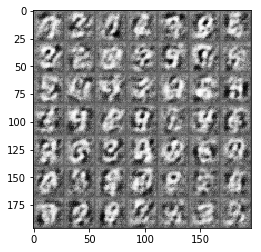

Epoch 1/2... Discriminator Loss: 1.2444... Generator Loss: 0.6538
Epoch 1/2... Discriminator Loss: 1.2920... Generator Loss: 0.9836
Epoch 1/2... Discriminator Loss: 1.1738... Generator Loss: 1.4138
Epoch 1/2... Discriminator Loss: 1.1364... Generator Loss: 1.6742
Epoch 1/2... Discriminator Loss: 1.3293... Generator Loss: 0.6393
Epoch 1/2... Discriminator Loss: 1.6721... Generator Loss: 3.0011
Epoch 1/2... Discriminator Loss: 1.0262... Generator Loss: 1.1218
Epoch 1/2... Discriminator Loss: 1.3183... Generator Loss: 0.6039
Epoch 1/2... Discriminator Loss: 0.9682... Generator Loss: 0.9800
Epoch 1/2... Discriminator Loss: 1.3847... Generator Loss: 0.5470


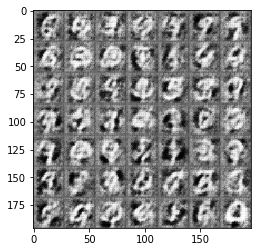

Epoch 1/2... Discriminator Loss: 1.0173... Generator Loss: 0.9991
Epoch 1/2... Discriminator Loss: 1.2329... Generator Loss: 1.6737
Epoch 1/2... Discriminator Loss: 1.4697... Generator Loss: 0.4910
Epoch 1/2... Discriminator Loss: 1.0233... Generator Loss: 1.0033
Epoch 1/2... Discriminator Loss: 2.4164... Generator Loss: 0.1761
Epoch 1/2... Discriminator Loss: 0.9920... Generator Loss: 1.2450
Epoch 1/2... Discriminator Loss: 1.1843... Generator Loss: 1.1825
Epoch 1/2... Discriminator Loss: 1.5427... Generator Loss: 0.4465
Epoch 1/2... Discriminator Loss: 1.3610... Generator Loss: 0.8536
Epoch 1/2... Discriminator Loss: 1.1785... Generator Loss: 1.2337


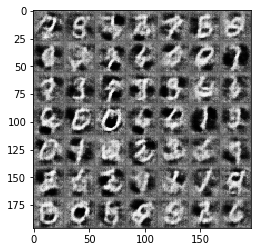

Epoch 1/2... Discriminator Loss: 1.2975... Generator Loss: 1.8268
Epoch 1/2... Discriminator Loss: 1.5842... Generator Loss: 0.4581
Epoch 1/2... Discriminator Loss: 1.2579... Generator Loss: 0.7795
Epoch 1/2... Discriminator Loss: 1.2096... Generator Loss: 0.8933
Epoch 1/2... Discriminator Loss: 1.2783... Generator Loss: 1.1708
Epoch 1/2... Discriminator Loss: 1.2980... Generator Loss: 0.6250
Epoch 1/2... Discriminator Loss: 1.1829... Generator Loss: 1.2881
Epoch 1/2... Discriminator Loss: 1.1266... Generator Loss: 1.4499
Epoch 1/2... Discriminator Loss: 1.4445... Generator Loss: 1.4342
Epoch 1/2... Discriminator Loss: 1.4424... Generator Loss: 1.7077


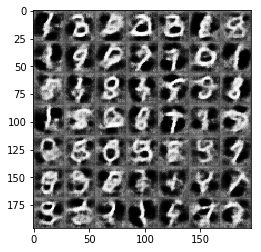

Epoch 1/2... Discriminator Loss: 1.2101... Generator Loss: 1.9680
Epoch 1/2... Discriminator Loss: 1.1685... Generator Loss: 1.5812
Epoch 1/2... Discriminator Loss: 1.2335... Generator Loss: 0.7135
Epoch 1/2... Discriminator Loss: 1.3305... Generator Loss: 0.5984
Epoch 1/2... Discriminator Loss: 1.0600... Generator Loss: 1.4601
Epoch 1/2... Discriminator Loss: 1.0496... Generator Loss: 0.9760
Epoch 1/2... Discriminator Loss: 1.2509... Generator Loss: 0.7227
Epoch 1/2... Discriminator Loss: 1.1487... Generator Loss: 1.0765
Epoch 1/2... Discriminator Loss: 1.2692... Generator Loss: 1.6643
Epoch 1/2... Discriminator Loss: 1.0481... Generator Loss: 0.9823


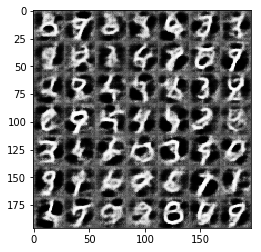

Epoch 1/2... Discriminator Loss: 1.4083... Generator Loss: 0.5227
Epoch 1/2... Discriminator Loss: 1.0327... Generator Loss: 0.9631
Epoch 1/2... Discriminator Loss: 1.3725... Generator Loss: 0.5988
Epoch 1/2... Discriminator Loss: 1.1357... Generator Loss: 0.8493
Epoch 1/2... Discriminator Loss: 1.1916... Generator Loss: 0.9274
Epoch 1/2... Discriminator Loss: 1.1956... Generator Loss: 0.8170
Epoch 1/2... Discriminator Loss: 1.1782... Generator Loss: 0.7691
Epoch 1/2... Discriminator Loss: 1.0897... Generator Loss: 1.2145
Epoch 1/2... Discriminator Loss: 1.2306... Generator Loss: 1.4052
Epoch 1/2... Discriminator Loss: 1.1916... Generator Loss: 0.8047


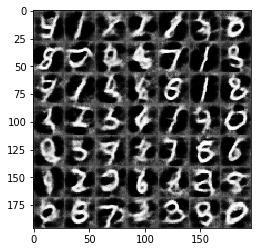

Epoch 1/2... Discriminator Loss: 1.1863... Generator Loss: 1.7181
Epoch 1/2... Discriminator Loss: 1.2725... Generator Loss: 0.5976
Epoch 1/2... Discriminator Loss: 1.5274... Generator Loss: 0.4423
Epoch 1/2... Discriminator Loss: 1.2999... Generator Loss: 0.6183
Epoch 1/2... Discriminator Loss: 1.6938... Generator Loss: 0.3591
Epoch 1/2... Discriminator Loss: 1.1316... Generator Loss: 0.8882
Epoch 1/2... Discriminator Loss: 1.5026... Generator Loss: 0.4650
Epoch 1/2... Discriminator Loss: 1.2794... Generator Loss: 0.6149
Epoch 1/2... Discriminator Loss: 1.0427... Generator Loss: 1.2277
Epoch 1/2... Discriminator Loss: 1.0448... Generator Loss: 1.1844


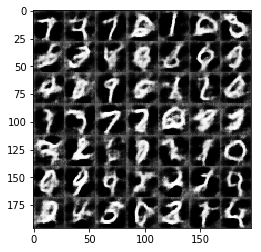

Epoch 1/2... Discriminator Loss: 1.6488... Generator Loss: 0.4118
Epoch 1/2... Discriminator Loss: 1.1318... Generator Loss: 0.7720
Epoch 1/2... Discriminator Loss: 1.1578... Generator Loss: 0.8298
Epoch 1/2... Discriminator Loss: 0.9998... Generator Loss: 1.0730
Epoch 1/2... Discriminator Loss: 1.0050... Generator Loss: 1.9673
Epoch 1/2... Discriminator Loss: 0.9550... Generator Loss: 1.1110
Epoch 1/2... Discriminator Loss: 1.0960... Generator Loss: 0.8431
Epoch 1/2... Discriminator Loss: 1.1009... Generator Loss: 0.7611
Epoch 1/2... Discriminator Loss: 0.9910... Generator Loss: 1.1913
Epoch 1/2... Discriminator Loss: 2.0182... Generator Loss: 0.2765


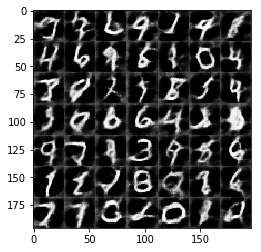

Epoch 1/2... Discriminator Loss: 1.0299... Generator Loss: 1.2242
Epoch 1/2... Discriminator Loss: 0.9678... Generator Loss: 1.8006
Epoch 1/2... Discriminator Loss: 1.3509... Generator Loss: 0.5898
Epoch 1/2... Discriminator Loss: 1.0356... Generator Loss: 1.2637
Epoch 1/2... Discriminator Loss: 1.0205... Generator Loss: 1.2914
Epoch 1/2... Discriminator Loss: 2.7080... Generator Loss: 0.1572
Epoch 1/2... Discriminator Loss: 0.9599... Generator Loss: 1.0520
Epoch 1/2... Discriminator Loss: 1.1015... Generator Loss: 0.7886
Epoch 1/2... Discriminator Loss: 1.0453... Generator Loss: 1.6247
Epoch 1/2... Discriminator Loss: 1.0472... Generator Loss: 1.2369


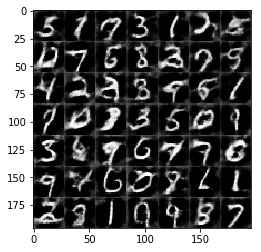

Epoch 1/2... Discriminator Loss: 1.0903... Generator Loss: 1.3607
Epoch 1/2... Discriminator Loss: 1.0543... Generator Loss: 0.8172
Epoch 1/2... Discriminator Loss: 0.9547... Generator Loss: 0.9879
Epoch 2/2... Discriminator Loss: 1.9909... Generator Loss: 3.3328
Epoch 2/2... Discriminator Loss: 1.2318... Generator Loss: 0.6957
Epoch 2/2... Discriminator Loss: 1.0508... Generator Loss: 0.9100
Epoch 2/2... Discriminator Loss: 0.8476... Generator Loss: 1.3012
Epoch 2/2... Discriminator Loss: 0.8617... Generator Loss: 1.2677
Epoch 2/2... Discriminator Loss: 1.6851... Generator Loss: 2.1944
Epoch 2/2... Discriminator Loss: 1.3366... Generator Loss: 0.5997


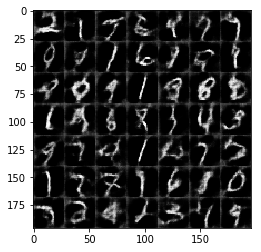

Epoch 2/2... Discriminator Loss: 1.0821... Generator Loss: 0.8015
Epoch 2/2... Discriminator Loss: 1.2302... Generator Loss: 0.6375
Epoch 2/2... Discriminator Loss: 1.4141... Generator Loss: 0.5155
Epoch 2/2... Discriminator Loss: 1.4189... Generator Loss: 0.5096
Epoch 2/2... Discriminator Loss: 1.5118... Generator Loss: 0.4452
Epoch 2/2... Discriminator Loss: 1.2816... Generator Loss: 0.5844
Epoch 2/2... Discriminator Loss: 1.0988... Generator Loss: 0.8590
Epoch 2/2... Discriminator Loss: 0.9925... Generator Loss: 1.0031
Epoch 2/2... Discriminator Loss: 1.5904... Generator Loss: 2.0969
Epoch 2/2... Discriminator Loss: 1.1656... Generator Loss: 1.2833


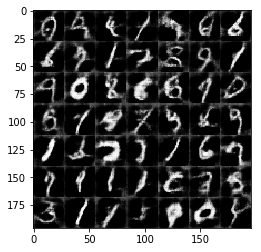

Epoch 2/2... Discriminator Loss: 1.0814... Generator Loss: 0.9244
Epoch 2/2... Discriminator Loss: 0.9521... Generator Loss: 1.0733
Epoch 2/2... Discriminator Loss: 1.4536... Generator Loss: 1.0446
Epoch 2/2... Discriminator Loss: 1.2512... Generator Loss: 0.7781
Epoch 2/2... Discriminator Loss: 1.1754... Generator Loss: 0.7063
Epoch 2/2... Discriminator Loss: 0.8604... Generator Loss: 1.4034
Epoch 2/2... Discriminator Loss: 0.9852... Generator Loss: 0.8884
Epoch 2/2... Discriminator Loss: 1.1574... Generator Loss: 1.8420
Epoch 2/2... Discriminator Loss: 1.6704... Generator Loss: 0.3828
Epoch 2/2... Discriminator Loss: 1.0604... Generator Loss: 1.4275


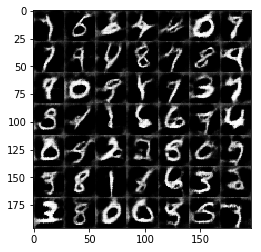

Epoch 2/2... Discriminator Loss: 0.9278... Generator Loss: 1.1278
Epoch 2/2... Discriminator Loss: 1.0522... Generator Loss: 0.7964
Epoch 2/2... Discriminator Loss: 1.6386... Generator Loss: 0.3671
Epoch 2/2... Discriminator Loss: 1.0714... Generator Loss: 0.7993
Epoch 2/2... Discriminator Loss: 0.8917... Generator Loss: 1.0618
Epoch 2/2... Discriminator Loss: 0.9934... Generator Loss: 0.9192
Epoch 2/2... Discriminator Loss: 1.0381... Generator Loss: 1.1037
Epoch 2/2... Discriminator Loss: 1.1941... Generator Loss: 2.1368
Epoch 2/2... Discriminator Loss: 1.6120... Generator Loss: 0.4287
Epoch 2/2... Discriminator Loss: 1.0054... Generator Loss: 0.9250


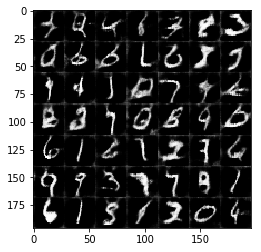

Epoch 2/2... Discriminator Loss: 1.2202... Generator Loss: 0.6951
Epoch 2/2... Discriminator Loss: 0.7906... Generator Loss: 1.3125
Epoch 2/2... Discriminator Loss: 0.9995... Generator Loss: 0.8733
Epoch 2/2... Discriminator Loss: 1.2449... Generator Loss: 0.6895
Epoch 2/2... Discriminator Loss: 2.8406... Generator Loss: 0.1742
Epoch 2/2... Discriminator Loss: 1.1793... Generator Loss: 0.7514
Epoch 2/2... Discriminator Loss: 2.2375... Generator Loss: 0.3007
Epoch 2/2... Discriminator Loss: 0.9857... Generator Loss: 1.2939
Epoch 2/2... Discriminator Loss: 1.0379... Generator Loss: 0.8792
Epoch 2/2... Discriminator Loss: 1.0857... Generator Loss: 1.0035


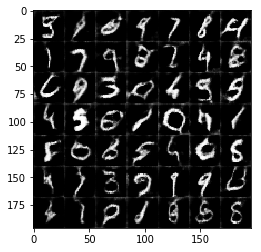

Epoch 2/2... Discriminator Loss: 1.0192... Generator Loss: 1.4773
Epoch 2/2... Discriminator Loss: 0.8842... Generator Loss: 1.2147
Epoch 2/2... Discriminator Loss: 0.9556... Generator Loss: 1.5603
Epoch 2/2... Discriminator Loss: 1.1399... Generator Loss: 0.7685
Epoch 2/2... Discriminator Loss: 0.9367... Generator Loss: 1.1361
Epoch 2/2... Discriminator Loss: 0.6881... Generator Loss: 1.7784
Epoch 2/2... Discriminator Loss: 1.0716... Generator Loss: 0.8626
Epoch 2/2... Discriminator Loss: 1.2570... Generator Loss: 2.2238
Epoch 2/2... Discriminator Loss: 1.2033... Generator Loss: 0.7619
Epoch 2/2... Discriminator Loss: 1.2128... Generator Loss: 1.9604


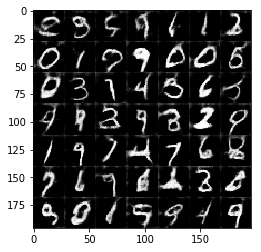

Epoch 2/2... Discriminator Loss: 1.5068... Generator Loss: 0.4691
Epoch 2/2... Discriminator Loss: 1.0400... Generator Loss: 0.8344
Epoch 2/2... Discriminator Loss: 1.2786... Generator Loss: 0.6376
Epoch 2/2... Discriminator Loss: 0.9374... Generator Loss: 1.3093
Epoch 2/2... Discriminator Loss: 0.7414... Generator Loss: 1.4765
Epoch 2/2... Discriminator Loss: 1.2081... Generator Loss: 0.7204
Epoch 2/2... Discriminator Loss: 1.3466... Generator Loss: 0.5997
Epoch 2/2... Discriminator Loss: 0.8345... Generator Loss: 1.1063
Epoch 2/2... Discriminator Loss: 0.9315... Generator Loss: 1.1043
Epoch 2/2... Discriminator Loss: 1.3057... Generator Loss: 0.5732


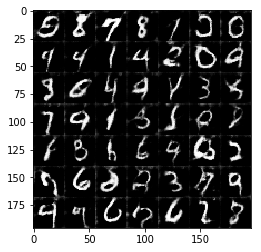

Epoch 2/2... Discriminator Loss: 1.7748... Generator Loss: 0.4234
Epoch 2/2... Discriminator Loss: 0.9542... Generator Loss: 0.9688
Epoch 2/2... Discriminator Loss: 0.9846... Generator Loss: 1.7840
Epoch 2/2... Discriminator Loss: 0.9321... Generator Loss: 1.5380
Epoch 2/2... Discriminator Loss: 0.9315... Generator Loss: 1.0695
Epoch 2/2... Discriminator Loss: 0.7631... Generator Loss: 1.8426
Epoch 2/2... Discriminator Loss: 1.4585... Generator Loss: 0.5028
Epoch 2/2... Discriminator Loss: 0.8728... Generator Loss: 1.3699
Epoch 2/2... Discriminator Loss: 1.2262... Generator Loss: 0.6657
Epoch 2/2... Discriminator Loss: 0.8040... Generator Loss: 1.2395


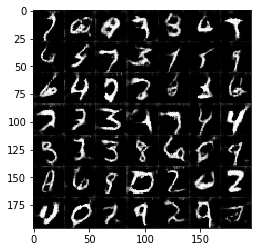

Epoch 2/2... Discriminator Loss: 0.9857... Generator Loss: 1.9496
Epoch 2/2... Discriminator Loss: 1.1681... Generator Loss: 0.7337
Epoch 2/2... Discriminator Loss: 1.5315... Generator Loss: 0.5152
Epoch 2/2... Discriminator Loss: 1.2864... Generator Loss: 0.6959
Epoch 2/2... Discriminator Loss: 1.5701... Generator Loss: 0.5257
Epoch 2/2... Discriminator Loss: 1.0869... Generator Loss: 1.0039
Epoch 2/2... Discriminator Loss: 1.0249... Generator Loss: 1.1362
Epoch 2/2... Discriminator Loss: 1.2481... Generator Loss: 2.4651
Epoch 2/2... Discriminator Loss: 1.2123... Generator Loss: 0.7616
Epoch 2/2... Discriminator Loss: 0.8881... Generator Loss: 1.5354


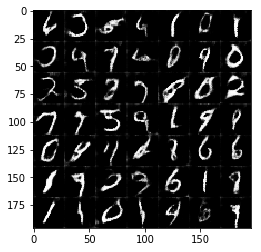

Epoch 2/2... Discriminator Loss: 1.0022... Generator Loss: 0.8896
Epoch 2/2... Discriminator Loss: 1.2469... Generator Loss: 0.6146
Epoch 2/2... Discriminator Loss: 0.8127... Generator Loss: 1.5824
Epoch 2/2... Discriminator Loss: 0.8309... Generator Loss: 1.5002
Epoch 2/2... Discriminator Loss: 1.1383... Generator Loss: 0.7871
Epoch 2/2... Discriminator Loss: 1.5847... Generator Loss: 0.4787
Epoch 2/2... Discriminator Loss: 1.0018... Generator Loss: 2.3323


In [12]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.3089... Generator Loss: 0.9345
Epoch 1/1... Discriminator Loss: 1.8683... Generator Loss: 7.3015
Epoch 1/1... Discriminator Loss: 1.1421... Generator Loss: 1.1329
Epoch 1/1... Discriminator Loss: 1.9935... Generator Loss: 0.3142
Epoch 1/1... Discriminator Loss: 0.6620... Generator Loss: 2.0339
Epoch 1/1... Discriminator Loss: 0.7233... Generator Loss: 4.5475
Epoch 1/1... Discriminator Loss: 0.7152... Generator Loss: 3.6668
Epoch 1/1... Discriminator Loss: 0.9022... Generator Loss: 1.2778
Epoch 1/1... Discriminator Loss: 0.6840... Generator Loss: 4.9129
Epoch 1/1... Discriminator Loss: 0.7229... Generator Loss: 3.6484


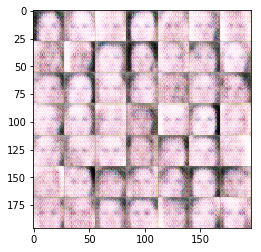

Epoch 1/1... Discriminator Loss: 0.4094... Generator Loss: 3.8147
Epoch 1/1... Discriminator Loss: 0.6555... Generator Loss: 2.0844
Epoch 1/1... Discriminator Loss: 0.5216... Generator Loss: 3.1375
Epoch 1/1... Discriminator Loss: 1.9848... Generator Loss: 0.3310
Epoch 1/1... Discriminator Loss: 0.6761... Generator Loss: 1.5481
Epoch 1/1... Discriminator Loss: 0.6344... Generator Loss: 1.7300
Epoch 1/1... Discriminator Loss: 2.7140... Generator Loss: 0.1338
Epoch 1/1... Discriminator Loss: 0.6549... Generator Loss: 1.8412
Epoch 1/1... Discriminator Loss: 1.8906... Generator Loss: 3.5374
Epoch 1/1... Discriminator Loss: 0.5244... Generator Loss: 2.1080


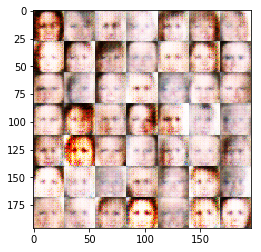

Epoch 1/1... Discriminator Loss: 1.1329... Generator Loss: 4.2206
Epoch 1/1... Discriminator Loss: 1.3809... Generator Loss: 0.5513
Epoch 1/1... Discriminator Loss: 0.9996... Generator Loss: 1.3081
Epoch 1/1... Discriminator Loss: 1.8271... Generator Loss: 0.3328
Epoch 1/1... Discriminator Loss: 1.0265... Generator Loss: 0.9264
Epoch 1/1... Discriminator Loss: 0.8497... Generator Loss: 1.4672
Epoch 1/1... Discriminator Loss: 1.2857... Generator Loss: 2.2629
Epoch 1/1... Discriminator Loss: 0.5721... Generator Loss: 3.5775
Epoch 1/1... Discriminator Loss: 1.8413... Generator Loss: 5.5820
Epoch 1/1... Discriminator Loss: 1.5156... Generator Loss: 0.4358


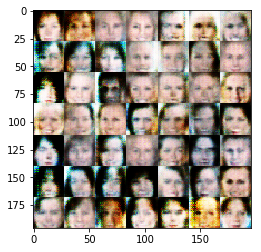

Epoch 1/1... Discriminator Loss: 0.8624... Generator Loss: 1.1600
Epoch 1/1... Discriminator Loss: 0.6377... Generator Loss: 5.0177
Epoch 1/1... Discriminator Loss: 0.9855... Generator Loss: 0.9951
Epoch 1/1... Discriminator Loss: 1.0404... Generator Loss: 0.8729
Epoch 1/1... Discriminator Loss: 1.8866... Generator Loss: 0.3119
Epoch 1/1... Discriminator Loss: 0.6793... Generator Loss: 1.8724
Epoch 1/1... Discriminator Loss: 0.7633... Generator Loss: 1.2014
Epoch 1/1... Discriminator Loss: 1.7429... Generator Loss: 0.3200
Epoch 1/1... Discriminator Loss: 1.2004... Generator Loss: 0.6169
Epoch 1/1... Discriminator Loss: 0.6436... Generator Loss: 2.9493


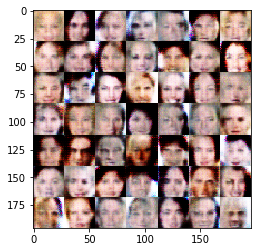

Epoch 1/1... Discriminator Loss: 0.5582... Generator Loss: 2.4822
Epoch 1/1... Discriminator Loss: 0.5927... Generator Loss: 2.0164
Epoch 1/1... Discriminator Loss: 0.9703... Generator Loss: 2.1385
Epoch 1/1... Discriminator Loss: 1.1705... Generator Loss: 3.8668
Epoch 1/1... Discriminator Loss: 0.7425... Generator Loss: 1.3670
Epoch 1/1... Discriminator Loss: 0.6388... Generator Loss: 1.5959
Epoch 1/1... Discriminator Loss: 1.4431... Generator Loss: 0.4704
Epoch 1/1... Discriminator Loss: 0.4755... Generator Loss: 2.4992
Epoch 1/1... Discriminator Loss: 0.5377... Generator Loss: 2.4459
Epoch 1/1... Discriminator Loss: 0.5118... Generator Loss: 3.8233


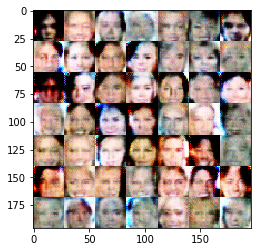

Epoch 1/1... Discriminator Loss: 0.6310... Generator Loss: 4.3400
Epoch 1/1... Discriminator Loss: 1.1454... Generator Loss: 2.3952
Epoch 1/1... Discriminator Loss: 1.0670... Generator Loss: 0.8155
Epoch 1/1... Discriminator Loss: 1.5619... Generator Loss: 0.4113
Epoch 1/1... Discriminator Loss: 0.6153... Generator Loss: 2.0673
Epoch 1/1... Discriminator Loss: 0.5539... Generator Loss: 2.1972
Epoch 1/1... Discriminator Loss: 1.1447... Generator Loss: 0.6774
Epoch 1/1... Discriminator Loss: 1.8141... Generator Loss: 4.4214
Epoch 1/1... Discriminator Loss: 0.7475... Generator Loss: 1.3156
Epoch 1/1... Discriminator Loss: 0.6666... Generator Loss: 2.9092


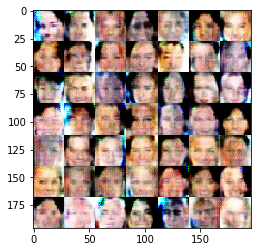

Epoch 1/1... Discriminator Loss: 0.9598... Generator Loss: 0.9507
Epoch 1/1... Discriminator Loss: 1.0004... Generator Loss: 1.0190
Epoch 1/1... Discriminator Loss: 0.9494... Generator Loss: 1.9635
Epoch 1/1... Discriminator Loss: 1.0120... Generator Loss: 0.8781
Epoch 1/1... Discriminator Loss: 0.7520... Generator Loss: 2.1353
Epoch 1/1... Discriminator Loss: 0.8170... Generator Loss: 1.2624
Epoch 1/1... Discriminator Loss: 1.3622... Generator Loss: 3.5760
Epoch 1/1... Discriminator Loss: 0.7803... Generator Loss: 2.4693
Epoch 1/1... Discriminator Loss: 0.7317... Generator Loss: 1.6800
Epoch 1/1... Discriminator Loss: 1.2313... Generator Loss: 3.0216


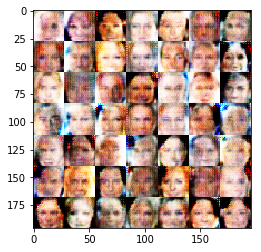

Epoch 1/1... Discriminator Loss: 0.7269... Generator Loss: 1.3793
Epoch 1/1... Discriminator Loss: 0.8792... Generator Loss: 1.6936
Epoch 1/1... Discriminator Loss: 0.9125... Generator Loss: 3.3092
Epoch 1/1... Discriminator Loss: 1.0675... Generator Loss: 0.8946
Epoch 1/1... Discriminator Loss: 0.8450... Generator Loss: 1.0726
Epoch 1/1... Discriminator Loss: 0.8897... Generator Loss: 2.1842
Epoch 1/1... Discriminator Loss: 0.6474... Generator Loss: 2.5355
Epoch 1/1... Discriminator Loss: 1.3517... Generator Loss: 1.9372
Epoch 1/1... Discriminator Loss: 0.7048... Generator Loss: 1.8213
Epoch 1/1... Discriminator Loss: 0.7800... Generator Loss: 2.3841


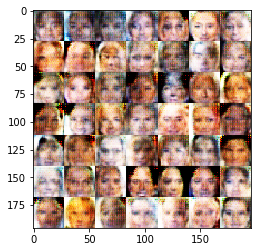

Epoch 1/1... Discriminator Loss: 1.8219... Generator Loss: 3.1406
Epoch 1/1... Discriminator Loss: 0.9525... Generator Loss: 1.4895
Epoch 1/1... Discriminator Loss: 0.6673... Generator Loss: 1.9729
Epoch 1/1... Discriminator Loss: 1.7323... Generator Loss: 0.3659
Epoch 1/1... Discriminator Loss: 0.8328... Generator Loss: 1.1496
Epoch 1/1... Discriminator Loss: 1.1482... Generator Loss: 0.7337
Epoch 1/1... Discriminator Loss: 0.7774... Generator Loss: 2.9390
Epoch 1/1... Discriminator Loss: 0.9524... Generator Loss: 0.9426
Epoch 1/1... Discriminator Loss: 0.7504... Generator Loss: 1.3102
Epoch 1/1... Discriminator Loss: 2.0850... Generator Loss: 0.2508


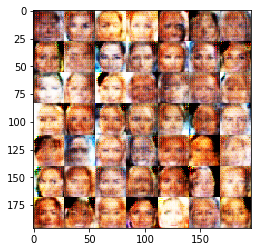

Epoch 1/1... Discriminator Loss: 1.1209... Generator Loss: 0.7847
Epoch 1/1... Discriminator Loss: 1.2833... Generator Loss: 3.1777
Epoch 1/1... Discriminator Loss: 0.6309... Generator Loss: 1.9167
Epoch 1/1... Discriminator Loss: 0.6836... Generator Loss: 3.8264
Epoch 1/1... Discriminator Loss: 2.9444... Generator Loss: 3.7585
Epoch 1/1... Discriminator Loss: 0.8195... Generator Loss: 1.3313
Epoch 1/1... Discriminator Loss: 0.9723... Generator Loss: 0.9344
Epoch 1/1... Discriminator Loss: 0.9166... Generator Loss: 2.0088
Epoch 1/1... Discriminator Loss: 1.1841... Generator Loss: 0.6862
Epoch 1/1... Discriminator Loss: 1.4518... Generator Loss: 0.4640


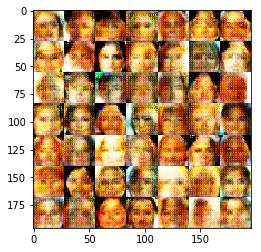

Epoch 1/1... Discriminator Loss: 0.8559... Generator Loss: 1.1773
Epoch 1/1... Discriminator Loss: 0.6574... Generator Loss: 1.7907
Epoch 1/1... Discriminator Loss: 0.8839... Generator Loss: 2.6170
Epoch 1/1... Discriminator Loss: 0.5990... Generator Loss: 1.6587
Epoch 1/1... Discriminator Loss: 3.7053... Generator Loss: 0.0777
Epoch 1/1... Discriminator Loss: 0.6879... Generator Loss: 1.8654
Epoch 1/1... Discriminator Loss: 0.7639... Generator Loss: 2.1876
Epoch 1/1... Discriminator Loss: 1.1677... Generator Loss: 0.6669
Epoch 1/1... Discriminator Loss: 0.7956... Generator Loss: 1.1804
Epoch 1/1... Discriminator Loss: 1.6719... Generator Loss: 2.9177


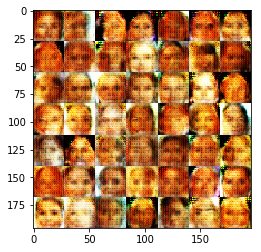

Epoch 1/1... Discriminator Loss: 0.8791... Generator Loss: 1.7474
Epoch 1/1... Discriminator Loss: 0.7368... Generator Loss: 1.8851
Epoch 1/1... Discriminator Loss: 0.7741... Generator Loss: 2.5617
Epoch 1/1... Discriminator Loss: 0.5583... Generator Loss: 2.0621
Epoch 1/1... Discriminator Loss: 0.7663... Generator Loss: 2.4130
Epoch 1/1... Discriminator Loss: 1.4157... Generator Loss: 0.6258
Epoch 1/1... Discriminator Loss: 0.7567... Generator Loss: 1.3616
Epoch 1/1... Discriminator Loss: 1.1132... Generator Loss: 0.7593
Epoch 1/1... Discriminator Loss: 0.3998... Generator Loss: 3.8430
Epoch 1/1... Discriminator Loss: 0.8384... Generator Loss: 1.2179


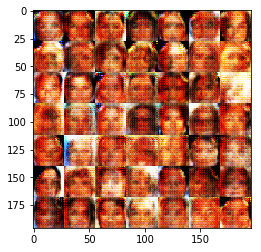

Epoch 1/1... Discriminator Loss: 0.7989... Generator Loss: 1.6901
Epoch 1/1... Discriminator Loss: 1.1682... Generator Loss: 0.7839
Epoch 1/1... Discriminator Loss: 1.0523... Generator Loss: 2.4966
Epoch 1/1... Discriminator Loss: 0.7198... Generator Loss: 1.3021
Epoch 1/1... Discriminator Loss: 0.9371... Generator Loss: 1.1214
Epoch 1/1... Discriminator Loss: 0.9902... Generator Loss: 0.9183
Epoch 1/1... Discriminator Loss: 0.9363... Generator Loss: 0.9596
Epoch 1/1... Discriminator Loss: 1.0436... Generator Loss: 0.9733
Epoch 1/1... Discriminator Loss: 1.3431... Generator Loss: 3.9736
Epoch 1/1... Discriminator Loss: 1.1852... Generator Loss: 0.6601


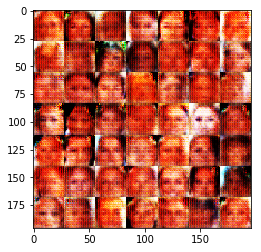

Epoch 1/1... Discriminator Loss: 0.9299... Generator Loss: 1.9934
Epoch 1/1... Discriminator Loss: 0.7410... Generator Loss: 1.6922
Epoch 1/1... Discriminator Loss: 1.4993... Generator Loss: 0.4739
Epoch 1/1... Discriminator Loss: 0.7137... Generator Loss: 1.4797
Epoch 1/1... Discriminator Loss: 1.0958... Generator Loss: 0.8453
Epoch 1/1... Discriminator Loss: 1.0068... Generator Loss: 1.8882
Epoch 1/1... Discriminator Loss: 0.7323... Generator Loss: 1.2957
Epoch 1/1... Discriminator Loss: 0.8260... Generator Loss: 1.7200
Epoch 1/1... Discriminator Loss: 0.8742... Generator Loss: 1.1802
Epoch 1/1... Discriminator Loss: 1.3765... Generator Loss: 0.5177


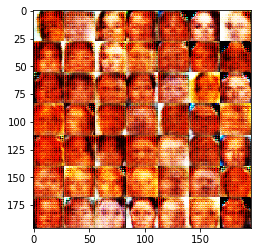

Epoch 1/1... Discriminator Loss: 0.8750... Generator Loss: 1.0109
Epoch 1/1... Discriminator Loss: 0.7310... Generator Loss: 4.0732
Epoch 1/1... Discriminator Loss: 1.0299... Generator Loss: 1.5293
Epoch 1/1... Discriminator Loss: 1.5425... Generator Loss: 0.4540
Epoch 1/1... Discriminator Loss: 0.9670... Generator Loss: 0.9450
Epoch 1/1... Discriminator Loss: 2.0644... Generator Loss: 2.3799
Epoch 1/1... Discriminator Loss: 0.9006... Generator Loss: 2.3960
Epoch 1/1... Discriminator Loss: 0.4947... Generator Loss: 2.3117
Epoch 1/1... Discriminator Loss: 1.1346... Generator Loss: 0.9520
Epoch 1/1... Discriminator Loss: 0.8234... Generator Loss: 1.2951


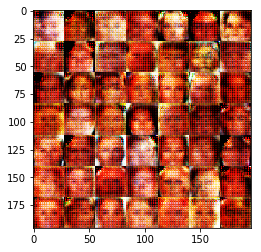

Epoch 1/1... Discriminator Loss: 1.1192... Generator Loss: 0.7592
Epoch 1/1... Discriminator Loss: 0.7961... Generator Loss: 3.3441
Epoch 1/1... Discriminator Loss: 0.7254... Generator Loss: 2.4366
Epoch 1/1... Discriminator Loss: 1.3615... Generator Loss: 0.5559
Epoch 1/1... Discriminator Loss: 0.7788... Generator Loss: 1.9134
Epoch 1/1... Discriminator Loss: 1.1527... Generator Loss: 2.5181
Epoch 1/1... Discriminator Loss: 0.9184... Generator Loss: 1.0470
Epoch 1/1... Discriminator Loss: 0.8707... Generator Loss: 2.1418


In [13]:
batch_size = 128
z_dim = 100
learning_rate = 0.0006
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.